<a href="https://colab.research.google.com/github/Ohalu909/AI-for-gamedev/blob/main/AIG_Assignment_3_HGBR_Keystrokes.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# NURSYAZWANI BINTI MOHAMMAD 17206746

# AFIFAH BINTI ABDUL HALIM 17203106

In [ ]:

!pip install neurokit2
!pip install shap


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 10.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 533.5/533.5 kB 7.4 MB/s eta 0:00:00


In [ ]:
# load Python packages
import pandas as pd
import numpy as np
import neurokit2 as nk
import matplotlib.pyplot as plt
from tqdm import tqdm
import xgboost
import shap
import warnings
import numpy as np
from datetime import datetime
warnings.filterwarnings("ignore")

In [ ]:
# load Maze Ball dataset
mb_data = pd.read_json("/content/mazeball.json")
mb_data = mb_data.mazeball.apply(pd.Series)
# data entries
mb_data.keys()

Index(['demographics', 'games', 'tutorial'], dtype='object')

In [ ]:
print(mb_data.iloc[1])

demographics    {'player_id': 2, 'age': 26, 'male': 1, 'playga...
games           [{'data': {'A': [{'variant': '1', 'physio': {'...
tutorial        {'variant': 'Tutorial', 'physio': {'SC': [30.1...
Name: 1, dtype: object


In [ ]:
print(mb_data.iloc[0]['tutorial'])

{'variant': 'Tutorial', 'physio': {'SC': [27.44, 27.43, 27.39, 27.38, 27.37, 27.36, 27.32, 27.3, 27.28, 27.26, 27.25, 27.25, 27.25, 27.26, 27.27, 27.31, 27.33, 27.34, 27.35, 27.37, 27.39, 27.4, 27.41, 27.44, 27.46, 27.48, 27.49, 27.52, 27.53, 27.54, 27.55, 27.55, 27.55, 27.55, 27.55, 27.55, 27.55, 27.55, 27.55, 27.55, 27.55, 27.55, 27.55, 27.55, 27.55, 27.59, 27.6, 27.63, 27.65, 27.67, 27.67, 27.68, 27.68, 27.68, 27.68, 27.71, 27.74, 27.77, 27.81, 27.84, 27.88, 27.92, 27.97, 28.0, 28.03, 28.05, 28.06, 28.07, 28.08, 28.08, 28.08, 28.08, 28.08, 28.08, 28.08, 28.08, 28.07, 28.08, 28.08, 28.07, 28.05, 28.03, 28.02, 27.98, 27.94, 27.91, 27.88, 27.85, 27.82, 27.79, 27.77, 27.74, 27.71, 27.7, 27.69, 27.68, 27.67, 27.65, 27.62, 27.59, 27.57, 27.56, 27.55, 27.55, 27.53, 27.51, 27.5, 27.46, 27.44, 27.42, 27.42, 27.41, 27.42, 27.4, 27.38, 27.37, 27.37, 27.36, 27.36, 27.36, 27.37, 27.38, 27.39, 27.41, 27.41, 27.45, 27.47, 27.5, 27.52, 27.54, 27.54, 27.55, 27.55, 27.56, 27.59, 27.63, 27.66, 27.67, 

In [ ]:
# player demographics
# each entry contains demographic information for one player
p_demo = mb_data['demographics']
p_games = mb_data['games']
p_tutorial = mb_data['tutorial']
print("There are {} players in the dataset.".format(p_demo.shape))


There are (36,) players in the dataset.


In [ ]:
print(p_games.iloc[0])

[{'data': {'A': [{'variant': '1', 'physio': {'SC': [29.67, 29.7, 29.72, 29.74, 29.74, 29.75, 29.75, 29.75, 29.75, 29.75, 29.75, 29.76, 29.8, 29.84, 29.87, 29.88, 29.89, 29.9, 29.9, 29.9, 29.9, 29.9, 29.92, 29.95, 29.97, 30.0, 30.02, 30.05, 30.08, 30.11, 30.17, 30.22, 30.26, 30.3, 30.32, 30.33, 30.34, 30.34, 30.34, 30.33, 30.32, 30.3, 30.3, 30.29, 30.28, 30.28, 30.28, 30.28, 30.27, 30.25, 30.22, 30.2, 30.17, 30.15, 30.14, 30.13, 30.13, 30.13, 30.13, 30.09, 30.06, 30.04, 30.02, 30.0, 30.01, 30.03, 30.04, 30.07, 30.1, 30.11, 30.16, 30.21, 30.26, 30.3, 30.32, 30.35, 30.39, 30.44, 30.46, 30.48, 30.51, 30.56, 30.6, 30.61, 30.61, 30.62, 30.66, 30.7, 30.71, 30.73, 30.75, 30.77, 30.78, 30.79, 30.8, 30.8, 30.8, 30.79, 30.79, 30.79, 30.78, 30.76, 30.75, 30.74, 30.73, 30.73, 30.73, 30.71, 30.64, 30.57, 30.53, 30.51, 30.5, 30.49, 30.49, 30.49, 30.49, 30.47, 30.45, 30.44, 30.41, 30.38, 30.36, 30.35, 30.34, 30.34, 30.34, 30.34, 30.34, 30.34, 30.34, 30.33, 30.3, 30.24, 30.19, 30.15, 30.13, 30.08, 30.0

In [ ]:
# let's take the first player as an example
player_no = 0
print("Player information: ")
print(p_demo[player_no])

p_games = mb_data['games']
print(p_games.iloc[0][0])
print("Number of sets of games played by this player is {}".format(np.shape(p_games[player_no])))

Player information: 
{'player_id': 1, 'age': 26, 'male': 1, 'playgames': 1, 'playgamesfrequency': 5}
{'data': {'A': [{'variant': '1', 'physio': {'SC': [29.67, 29.7, 29.72, 29.74, 29.74, 29.75, 29.75, 29.75, 29.75, 29.75, 29.75, 29.76, 29.8, 29.84, 29.87, 29.88, 29.89, 29.9, 29.9, 29.9, 29.9, 29.9, 29.92, 29.95, 29.97, 30.0, 30.02, 30.05, 30.08, 30.11, 30.17, 30.22, 30.26, 30.3, 30.32, 30.33, 30.34, 30.34, 30.34, 30.33, 30.32, 30.3, 30.3, 30.29, 30.28, 30.28, 30.28, 30.28, 30.27, 30.25, 30.22, 30.2, 30.17, 30.15, 30.14, 30.13, 30.13, 30.13, 30.13, 30.09, 30.06, 30.04, 30.02, 30.0, 30.01, 30.03, 30.04, 30.07, 30.1, 30.11, 30.16, 30.21, 30.26, 30.3, 30.32, 30.35, 30.39, 30.44, 30.46, 30.48, 30.51, 30.56, 30.6, 30.61, 30.61, 30.62, 30.66, 30.7, 30.71, 30.73, 30.75, 30.77, 30.78, 30.79, 30.8, 30.8, 30.8, 30.79, 30.79, 30.79, 30.78, 30.76, 30.75, 30.74, 30.73, 30.73, 30.73, 30.71, 30.64, 30.57, 30.53, 30.51, 30.5, 30.49, 30.49, 30.49, 30.49, 30.47, 30.45, 30.44, 30.41, 30.38, 30.36, 30.35, 3

In [ ]:
# let's take set 0 as an example
game_set_no = 0
# each entry contains game data and player preferences
p_games[player_no][game_set_no].keys()

dict_keys(['data', 'preferences'])

In [ ]:
p_games_data = p_games[player_no][game_set_no]['data']
p_games_pref = p_games[player_no][game_set_no]['preferences']

print("Information in data: ", p_games_data.keys())
print("Information in pref: ", p_games_pref.keys())
print(p_games.iloc[0][0]['data'])
# print(p_games.iloc[0][0]['data']['keystrokes'])
print(p_games.iloc[0][0]['preferences'])

Information in data:  dict_keys(['A', 'B'])
Information in pref:  dict_keys(['anxiety', 'challenge', 'excitement', 'boredom', 'frustration', 'relaxation', 'fun'])
{'A': [{'variant': '1', 'physio': {'SC': [29.67, 29.7, 29.72, 29.74, 29.74, 29.75, 29.75, 29.75, 29.75, 29.75, 29.75, 29.76, 29.8, 29.84, 29.87, 29.88, 29.89, 29.9, 29.9, 29.9, 29.9, 29.9, 29.92, 29.95, 29.97, 30.0, 30.02, 30.05, 30.08, 30.11, 30.17, 30.22, 30.26, 30.3, 30.32, 30.33, 30.34, 30.34, 30.34, 30.33, 30.32, 30.3, 30.3, 30.29, 30.28, 30.28, 30.28, 30.28, 30.27, 30.25, 30.22, 30.2, 30.17, 30.15, 30.14, 30.13, 30.13, 30.13, 30.13, 30.09, 30.06, 30.04, 30.02, 30.0, 30.01, 30.03, 30.04, 30.07, 30.1, 30.11, 30.16, 30.21, 30.26, 30.3, 30.32, 30.35, 30.39, 30.44, 30.46, 30.48, 30.51, 30.56, 30.6, 30.61, 30.61, 30.62, 30.66, 30.7, 30.71, 30.73, 30.75, 30.77, 30.78, 30.79, 30.8, 30.8, 30.8, 30.79, 30.79, 30.79, 30.78, 30.76, 30.75, 30.74, 30.73, 30.73, 30.73, 30.71, 30.64, 30.57, 30.53, 30.51, 30.5, 30.49, 30.49, 30.49, 30.4

In [ ]:
# in each set, players played Game A and Game B
# for subjective ratings, players were asked whether they felt more "Anxiety" or "Challenge" etc when playing Game A or Game B
print(p_games_pref['anxiety'])
print(p_games_pref['challenge'])
print(p_games_pref['excitement'])
print(p_games_pref['boredom'])
print(p_games_pref['frustration'])
print(p_games_pref['relaxation'])
print(p_games_pref['fun'])

B
B
B
A
Both equally
Both equally
B


In [ ]:
print(p_games_data['A'][0]['keystrokes'].keys())
print(p_games_data['A'][0]['keystrokes']['time'])

dict_keys(['leftpressed', 'uppressed', 'spacepressed', 'rightpressed', 'time', 'downpressed'])
[0.5160000000032591, 0.656000000002677, 4.594000000004598, 4.734000000004016, 5.514999999999418, 5.625, 6.703000000001339, 6.859000000004016, 7.436999999998079, 7.561999999998079, 8.219000000004598, 8.375, 8.796999999998661, 8.93699999999808, 11.343000000000757, 11.453000000001339, 12.203000000001339, 12.31199999999808, 13.43699999999808, 13.56199999999808, 14.468000000000757, 14.625, 16.249000000003434, 16.406000000002678, 17.531000000002678, 17.68699999999808, 18.014999999999418, 18.343000000000757, 18.57800000000134, 18.718000000000757, 19.281000000002678, 19.32800000000134, 19.374000000003434, 19.57800000000134, 20.389999999999418, 20.639999999999418, 23.576999999997497, 23.764999999999418, 24.718000000000757, 24.859000000004016, 25.56199999999808, 25.779999999998836, 26.18699999999808, 26.56199999999808, 27.234000000004016, 27.468000000000757, 28.218000000000757, 28.374000000003434, 28.8

In [ ]:
import numpy as np
from datetime import datetime

# Example usage:
keystrokes_leftpressed = p_games_data['A'][0]['keystrokes']['leftpressed']
keystrokes_time = p_games_data['A'][0]['keystrokes']['time']

key_data = keystrokes_leftpressed
timestamps = keystrokes_time

human_readable_timestamps = [datetime.utcfromtimestamp(ts).strftime('%Y-%m-%d %H:%M:%S') for ts in timestamps]

key_press_intervals = np.diff(timestamps)

key_features = {
    'total_key_presses': np.sum(key_data),
    'average_key_interval': np.mean(key_press_intervals) if len(key_press_intervals) > 0 else np.nan,
    'max_key_interval': np.max(key_press_intervals) if len(key_press_intervals) > 0 else np.nan,
    'min_key_interval': np.min(key_press_intervals) if len(key_press_intervals) > 0 else np.nan,
    'key_press_intervals': key_press_intervals.tolist(),
}

# Print the features for 'leftpressed'
# print("Leftpressed Features:")
# print(f"Total Key Presses: {key_features['total_key_presses']}")
# print(f"Average Key Interval: {key_features['average_key_interval']}")
# print(f"Max Key Interval: {key_features['max_key_interval']}")
# print(f"Min Key Interval: {key_features['min_key_interval']}")
# print("\nKey Press Intervals:")
# print(key_features['key_press_intervals'])
# print("\n")


print(type(key_features))

print(key_features)

<class 'dict'>
{'total_key_presses': 21, 'average_key_interval': 0.6519312977099117, 'max_key_interval': 4.0, 'min_key_interval': 0.046000000002095476, 'key_press_intervals': [0.13999999999941792, 3.9380000000019213, 0.13999999999941792, 0.7809999999954016, 0.11000000000058208, 1.0780000000013388, 0.15600000000267755, 0.5779999999940628, 0.125, 0.6570000000065193, 0.1559999999954016, 0.4219999999986612, 0.13999999999941792, 2.4060000000026776, 0.11000000000058208, 0.75, 0.10899999999674037, 1.125, 0.125, 0.9060000000026776, 0.1569999999992433, 1.6240000000034343, 0.1569999999992433, 1.125, 0.1559999999954016, 0.3280000000013388, 0.3280000000013388, 0.23500000000058208, 0.13999999999941792, 0.5630000000019209, 0.046999999998661224, 0.046000000002095476, 0.20399999999790452, 0.8119999999980791, 0.25, 2.936999999998079, 0.18800000000192085, 0.9530000000013388, 0.14100000000325963, 0.7029999999940628, 0.2180000000007567, 0.4069999999992433, 0.375, 0.6720000000059372, 0.23399999999674037, 0

In [ ]:
import numpy as np
from datetime import datetime

def extract_sc(signal):
    df, info = nk.eda_process(signal, sampling_rate=31)

    features_sc = np.array([
        np.nanmean(info['SCR_Amplitude']),
        np.nanstd(info['SCR_Amplitude']),
        np.nanmean(info['SCR_RiseTime']),
        np.nanstd(info['SCR_RiseTime']),
        np.nanmean(info['SCR_RecoveryTime']),
        np.nanstd(info['SCR_RecoveryTime'])
        ])

    feature_sc_names = [
        'SCR_Amplitude_mean',
        'SCR_Amplitude_std',
        'SCR_RiseTime_mean',
        'SCR_RiseTime_std',
        'SCR_RecoveryTime_mean',
        'SCR_RecoveryTime_std'
        ]

    return features_sc, feature_sc_names

def extract_bvp(signal):
    df, info = nk.ppg_process(p_games_data['A'][game_set_no]['physio']['BVP'], sampling_rate=31)
    feature_bvp = nk.ppg_intervalrelated(df, sampling_rate=31)
    feature_bvp_names = list(feature_bvp)

    return feature_bvp.to_numpy()[0], feature_bvp_names




def extract_ks(keystrokes_data, keystrokes_time):
    key_data = keystrokes_data
    timestamps = keystrokes_time

    key_press_intervals = np.diff(timestamps)

    key_features = {
        'total_key_presses': np.sum(key_data),
        'average_key_interval': np.mean(key_press_intervals) if len(key_press_intervals) > 0 else np.nan,
        'max_key_interval': np.max(key_press_intervals) if len(key_press_intervals) > 0 else np.nan,
        'min_key_interval': np.min(key_press_intervals) if len(key_press_intervals) > 0 else np.nan
        # 'key_press_intervals': key_press_intervals.tolist(),
    }

    features_ks_names = [
        'total_key_presses',
        'average_key_interval',
        'max_key_interval',
        'min_key_interval'
    ]

    return key_features,features_ks_names




In [ ]:
print(p_demo.iloc[0])
print(p_games.iloc[0])
print(p_tutorial.iloc[0])

{'player_id': 1, 'age': 26, 'male': 1, 'playgames': 1, 'playgamesfrequency': 5}
[{'data': {'A': [{'variant': '1', 'physio': {'SC': [29.67, 29.7, 29.72, 29.74, 29.74, 29.75, 29.75, 29.75, 29.75, 29.75, 29.75, 29.76, 29.8, 29.84, 29.87, 29.88, 29.89, 29.9, 29.9, 29.9, 29.9, 29.9, 29.92, 29.95, 29.97, 30.0, 30.02, 30.05, 30.08, 30.11, 30.17, 30.22, 30.26, 30.3, 30.32, 30.33, 30.34, 30.34, 30.34, 30.33, 30.32, 30.3, 30.3, 30.29, 30.28, 30.28, 30.28, 30.28, 30.27, 30.25, 30.22, 30.2, 30.17, 30.15, 30.14, 30.13, 30.13, 30.13, 30.13, 30.09, 30.06, 30.04, 30.02, 30.0, 30.01, 30.03, 30.04, 30.07, 30.1, 30.11, 30.16, 30.21, 30.26, 30.3, 30.32, 30.35, 30.39, 30.44, 30.46, 30.48, 30.51, 30.56, 30.6, 30.61, 30.61, 30.62, 30.66, 30.7, 30.71, 30.73, 30.75, 30.77, 30.78, 30.79, 30.8, 30.8, 30.8, 30.79, 30.79, 30.79, 30.78, 30.76, 30.75, 30.74, 30.73, 30.73, 30.73, 30.71, 30.64, 30.57, 30.53, 30.51, 30.5, 30.49, 30.49, 30.49, 30.49, 30.47, 30.45, 30.44, 30.41, 30.38, 30.36, 30.35, 30.34, 30.34, 30.34, 

In [ ]:
print(p_games.iloc[0][0]['preferences'])
print(p_games.iloc[0][0]['data']['A'][0])
gma = p_games.iloc[0][0]['data']['A'][0]
print(p_games.iloc[0][0]['data']['B'])

{'anxiety': 'B', 'challenge': 'B', 'excitement': 'B', 'boredom': 'A', 'frustration': 'Both equally', 'relaxation': 'Both equally', 'fun': 'B'}
{'variant': '1', 'physio': {'SC': [29.67, 29.7, 29.72, 29.74, 29.74, 29.75, 29.75, 29.75, 29.75, 29.75, 29.75, 29.76, 29.8, 29.84, 29.87, 29.88, 29.89, 29.9, 29.9, 29.9, 29.9, 29.9, 29.92, 29.95, 29.97, 30.0, 30.02, 30.05, 30.08, 30.11, 30.17, 30.22, 30.26, 30.3, 30.32, 30.33, 30.34, 30.34, 30.34, 30.33, 30.32, 30.3, 30.3, 30.29, 30.28, 30.28, 30.28, 30.28, 30.27, 30.25, 30.22, 30.2, 30.17, 30.15, 30.14, 30.13, 30.13, 30.13, 30.13, 30.09, 30.06, 30.04, 30.02, 30.0, 30.01, 30.03, 30.04, 30.07, 30.1, 30.11, 30.16, 30.21, 30.26, 30.3, 30.32, 30.35, 30.39, 30.44, 30.46, 30.48, 30.51, 30.56, 30.6, 30.61, 30.61, 30.62, 30.66, 30.7, 30.71, 30.73, 30.75, 30.77, 30.78, 30.79, 30.8, 30.8, 30.8, 30.79, 30.79, 30.79, 30.78, 30.76, 30.75, 30.74, 30.73, 30.73, 30.73, 30.71, 30.64, 30.57, 30.53, 30.51, 30.5, 30.49, 30.49, 30.49, 30.49, 30.47, 30.45, 30.44, 30.

In [ ]:
import numpy as np
from datetime import datetime
from tqdm import tqdm


alldata = {
    'player_id': [],
    'player_age': [],
    'player_gender': [],
    'player_playgames': [],
    'player_playfrequency': [],
    'game_variant': [],
    'features_ks_leftpressed': [],
    'features_ks_uppressed': [],
    'features_ks_spacepressed': [],
    'features_ks_rightpressed': [],
    'features_ks_downpressed': [],
    'class': [],
}

for a in tqdm(range(36)):  # player number
    # print("A:",a)
    player_demographics = p_demo[a]  # player demographics
    player_game = p_games[a]
    player_tutorial = p_tutorial[a]
    # print("Len of player games: ",len(player_game))
    for b in range(len(player_game)):  # game number
        # print("B:",b)
        game_pref = p_games[a][b]['preferences']
        game_a = p_games[a][b]['data']['A'][0]
        game_b = p_games[a][b]['data']['B']
        game_time_a = p_games[a][b]['data']['A'][0]['keystrokes']['time']
        game_time_b = p_games[a][b]['data']['B']['keystrokes']['time']

        # features_sc_a, features_sc_names = extract_sc(game_a['physio']['SC'])
        # features_sc_b, _ = extract_sc(game_b['physio']['SC'])
        # Game A keystroke features
        feature_ks_a_leftpressed, features_ks_names_al = extract_ks(game_a['keystrokes']['leftpressed'],game_time_a)
        feature_ks_a_uppressed, features_ks_names_au = extract_ks(game_a['keystrokes']['uppressed'],game_time_a)
        feature_ks_a_spacepressed, features_ks_names_as = extract_ks(game_a['keystrokes']['spacepressed'],game_time_a)
        feature_ks_a_rightpressed, features_ks_names_ar = extract_ks(game_a['keystrokes']['rightpressed'],game_time_a)
        feature_ks_a_downpressed, features_ks_names_ad = extract_ks(game_a['keystrokes']['downpressed'],game_time_a)

        feature_ks_b_leftpressed, features_ks_names_bl = extract_ks(game_b['keystrokes']['leftpressed'],game_time_b)
        feature_ks_b_uppressed, features_ks_names_bu = extract_ks(game_b['keystrokes']['uppressed'],game_time_b)
        feature_ks_b_spacepressed, features_ks_names_bs = extract_ks(game_b['keystrokes']['spacepressed'],game_time_b)
        feature_ks_b_rightpressed, features_ks_names_br = extract_ks(game_b['keystrokes']['rightpressed'],game_time_b)
        feature_ks_b_downpressed, features_ks_names_bd = extract_ks(game_b['keystrokes']['downpressed'],game_time_b)

       # which affective data to collect?
        c = "boredom"

        # append information for Game A
        alldata['player_id'] += [player_demographics['player_id']]
        alldata['player_age'] += [player_demographics['age']]
        alldata['player_gender'] += [player_demographics['male']]
        alldata['player_playgames'] += [player_demographics['playgames']]
        alldata['player_playfrequency'] += [player_demographics['playgamesfrequency']]

        alldata['game_variant'] += [game_a['variant']]
        # alldata['features_sc'] += [features_sc_a]
        alldata['features_ks_leftpressed'] += [feature_ks_a_leftpressed]
        alldata['features_ks_uppressed'] += [feature_ks_a_uppressed]
        alldata['features_ks_spacepressed'] += [feature_ks_a_spacepressed]
        alldata['features_ks_rightpressed'] += [feature_ks_a_rightpressed]
        alldata['features_ks_downpressed'] += [feature_ks_a_downpressed]

        # append information for Game B
        alldata['player_id'] += [player_demographics['player_id']]
        alldata['player_age'] += [player_demographics['age']]
        alldata['player_gender'] += [player_demographics['male']]
        alldata['player_playgames'] += [player_demographics['playgames']]
        alldata['player_playfrequency'] += [player_demographics['playgamesfrequency']]

        alldata['game_variant'] += [game_a['variant']]
        # alldata['features_sc'] += [features_sc_a]
        alldata['features_ks_leftpressed'] += [feature_ks_b_leftpressed]
        alldata['features_ks_uppressed'] += [feature_ks_b_uppressed]
        alldata['features_ks_spacepressed'] += [feature_ks_b_spacepressed]
        alldata['features_ks_rightpressed'] += [feature_ks_b_rightpressed]
        alldata['features_ks_downpressed'] += [feature_ks_b_downpressed]

        # generate labels based on preference ranking
        if game_pref[c] == "A": # if game A is more preferred than game B
            alldata['class'] += [1] # class label for Game A
            alldata['class'] += [0] # class label for Game B

        elif game_pref[c] == "B": # if game B is more preferred
            alldata['class'] += [0]
            alldata['class'] += [1]

        elif game_pref[c] == "Both equally":
            alldata['class'] += [1]
            alldata['class'] += [1]

        elif game_pref[c] == "Neither":
            alldata['class'] += [0]
            alldata['class'] += [0]

100%|██████████| 36/36 [00:00<00:00, 292.16it/s]


In [ ]:
print(len(alldata['game_variant']))
print(alldata['player_age'])
print(alldata.keys())
print(len(alldata['features_ks_downpressed']))
# print(type(alldata['features_sc']))
# print(len(alldata['features_sc']))
print(alldata['features_ks_leftpressed'])

288
[26, 26, 26, 26, 26, 26, 26, 26, 26, 26, 26, 26, 26, 26, 26, 26, 43, 43, 43, 43, 43, 43, 43, 43, 21, 21, 21, 21, 21, 21, 21, 21, 28, 28, 28, 28, 28, 28, 28, 28, 23, 23, 23, 23, 23, 23, 23, 23, 24, 24, 24, 24, 24, 24, 24, 24, 23, 23, 23, 23, 23, 23, 23, 23, 23, 23, 23, 23, 23, 23, 23, 23, 29, 29, 29, 29, 29, 29, 29, 29, 23, 23, 23, 23, 23, 23, 23, 23, 26, 26, 26, 26, 26, 26, 26, 26, 30, 30, 30, 30, 30, 30, 30, 30, 24, 24, 24, 24, 24, 24, 24, 24, 28, 28, 28, 28, 28, 28, 28, 28, 27, 27, 27, 27, 27, 27, 27, 27, 26, 26, 26, 26, 26, 26, 26, 26, 27, 27, 27, 27, 27, 27, 27, 27, 24, 24, 24, 24, 24, 24, 24, 24, 28, 28, 28, 28, 28, 28, 28, 28, 44, 44, 44, 44, 44, 44, 44, 44, 26, 26, 26, 26, 26, 26, 26, 26, 28, 28, 28, 28, 28, 28, 28, 28, 47, 47, 47, 47, 47, 47, 47, 47, 26, 26, 26, 26, 26, 26, 26, 26, 26, 26, 26, 26, 26, 26, 26, 26, 28, 28, 28, 28, 28, 28, 28, 28, 21, 21, 21, 21, 21, 21, 21, 21, 25, 25, 25, 25, 25, 25, 25, 25, 26, 26, 26, 26, 26, 26, 26, 26, 23, 23, 23, 23, 23, 23, 23, 23, 27,

In [ ]:
X = []  # training data
Y = []  # class label
Z = []  # player id for cross-validation

for i in range(len(alldata['class'])):
    vec = np.concatenate([
        np.array([alldata['player_age'][i],
                  alldata['player_gender'][i],
                  alldata['player_playgames'][i],
                  alldata['player_playfrequency'][i],
                  alldata['game_variant'][i],
                  alldata['features_ks_leftpressed'][i]['total_key_presses'],
                  alldata['features_ks_leftpressed'][i]['average_key_interval'],
                  alldata['features_ks_leftpressed'][i]['max_key_interval'],
                  alldata['features_ks_leftpressed'][i]['min_key_interval'],
                  alldata['features_ks_uppressed'][i]['total_key_presses'],
                  alldata['features_ks_uppressed'][i]['average_key_interval'],
                  alldata['features_ks_uppressed'][i]['max_key_interval'],
                  alldata['features_ks_uppressed'][i]['min_key_interval'],
                  alldata['features_ks_spacepressed'][i]['total_key_presses'],
                  alldata['features_ks_spacepressed'][i]['average_key_interval'],
                  alldata['features_ks_spacepressed'][i]['max_key_interval'],
                  alldata['features_ks_spacepressed'][i]['min_key_interval'],
                  alldata['features_ks_rightpressed'][i]['total_key_presses'],
                  alldata['features_ks_rightpressed'][i]['average_key_interval'],
                  alldata['features_ks_rightpressed'][i]['max_key_interval'],
                  alldata['features_ks_rightpressed'][i]['min_key_interval'],
                  alldata['features_ks_downpressed'][i]['total_key_presses'],
                  alldata['features_ks_downpressed'][i]['average_key_interval'],
                  alldata['features_ks_downpressed'][i]['max_key_interval'],
                  alldata['features_ks_downpressed'][i]['min_key_interval'],
                  ])
    ])

    X.append(vec.astype(float))
    Y.append(alldata['class'][i])
    Z.append(alldata['player_id'][i])

feature_names = []
feature_names += ['player_age']
feature_names += ['player_gender']
feature_names += ['player_playgames']
feature_names += ['player_playfrequency']
feature_names += ['game_variant']
feature_names += features_ks_names_al
feature_names += features_ks_names_au
feature_names += features_ks_names_as
feature_names += features_ks_names_ar
feature_names += features_ks_names_ad
feature_names += features_ks_names_bl
feature_names += features_ks_names_bu
feature_names += features_ks_names_bs
feature_names += features_ks_names_br
feature_names += features_ks_names_bd

X = np.array(X)
Y = np.array(Y)
Z = np.array(Z)
player_id = np.unique(Z)

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import HistGradientBoostingRegressor
from sklearn.metrics import mean_squared_error

# Split the data into training and testing sets
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

# Regression Model Training
regression_model = HistGradientBoostingRegressor()
regression_model.fit(X_train, Y_train)

# Predictions
y_pred = regression_model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(Y_test, y_pred)
print(f"Mean Squared Error: {mse}")


Mean Squared Error: 0.2827674605886595


In [ ]:
# Create an empty list to store all features
all_keys_list = []

# Iterate over the keys in the alldata dictionary
for key in alldata.keys():
    # Append each key to the list
    all_keys_list.append(key)

# Now, all_features_list contains all values from the alldata dictionary
print(all_keys_list)


['player_id', 'player_age', 'player_gender', 'player_playgames', 'player_playfrequency', 'game_variant', 'features_ks_leftpressed', 'features_ks_uppressed', 'features_ks_spacepressed', 'features_ks_rightpressed', 'features_ks_downpressed', 'class']


In [ ]:
# Your list of feature names
all_keys_list = [
    'player_age', 'player_gender', 'player_playgames', 'player_playfrequency',
    'game_variant',
    'features_ks_leftpressed.total_key_presses', 'features_ks_leftpressed.average_key_interval',
    'features_ks_leftpressed.max_key_interval', 'features_ks_leftpressed.min_key_interval',
    'features_ks_uppressed.total_key_presses', 'features_ks_uppressed.average_key_interval',
    'features_ks_uppressed.max_key_interval', 'features_ks_uppressed.min_key_interval',
    'features_ks_spacepressed.total_key_presses', 'features_ks_spacepressed.average_key_interval',
    'features_ks_spacepressed.max_key_interval', 'features_ks_spacepressed.min_key_interval',
    'features_ks_rightpressed.total_key_presses', 'features_ks_rightpressed.average_key_interval',
    'features_ks_rightpressed.max_key_interval', 'features_ks_rightpressed.min_key_interval',
    'features_ks_downpressed.total_key_presses', 'features_ks_downpressed.average_key_interval',
    'features_ks_downpressed.max_key_interval', 'features_ks_downpressed.min_key_interval'
]

# Indices obtained from permutation importance
# indices = [1, 0, 2, 3, 4, 26, 27, 24, 25, 22, 23, 20, 21, 18, 19, 16, 17, 14, 15, 12, 13, 10, 11, 8, 9, 6, 7, 5, 28]

# Create a new list of feature names in the order of the indices
feature_names_ordered = [all_keys_list[i] for i in indices]

# Print or use the ordered feature names as needed
print(feature_names_ordered)


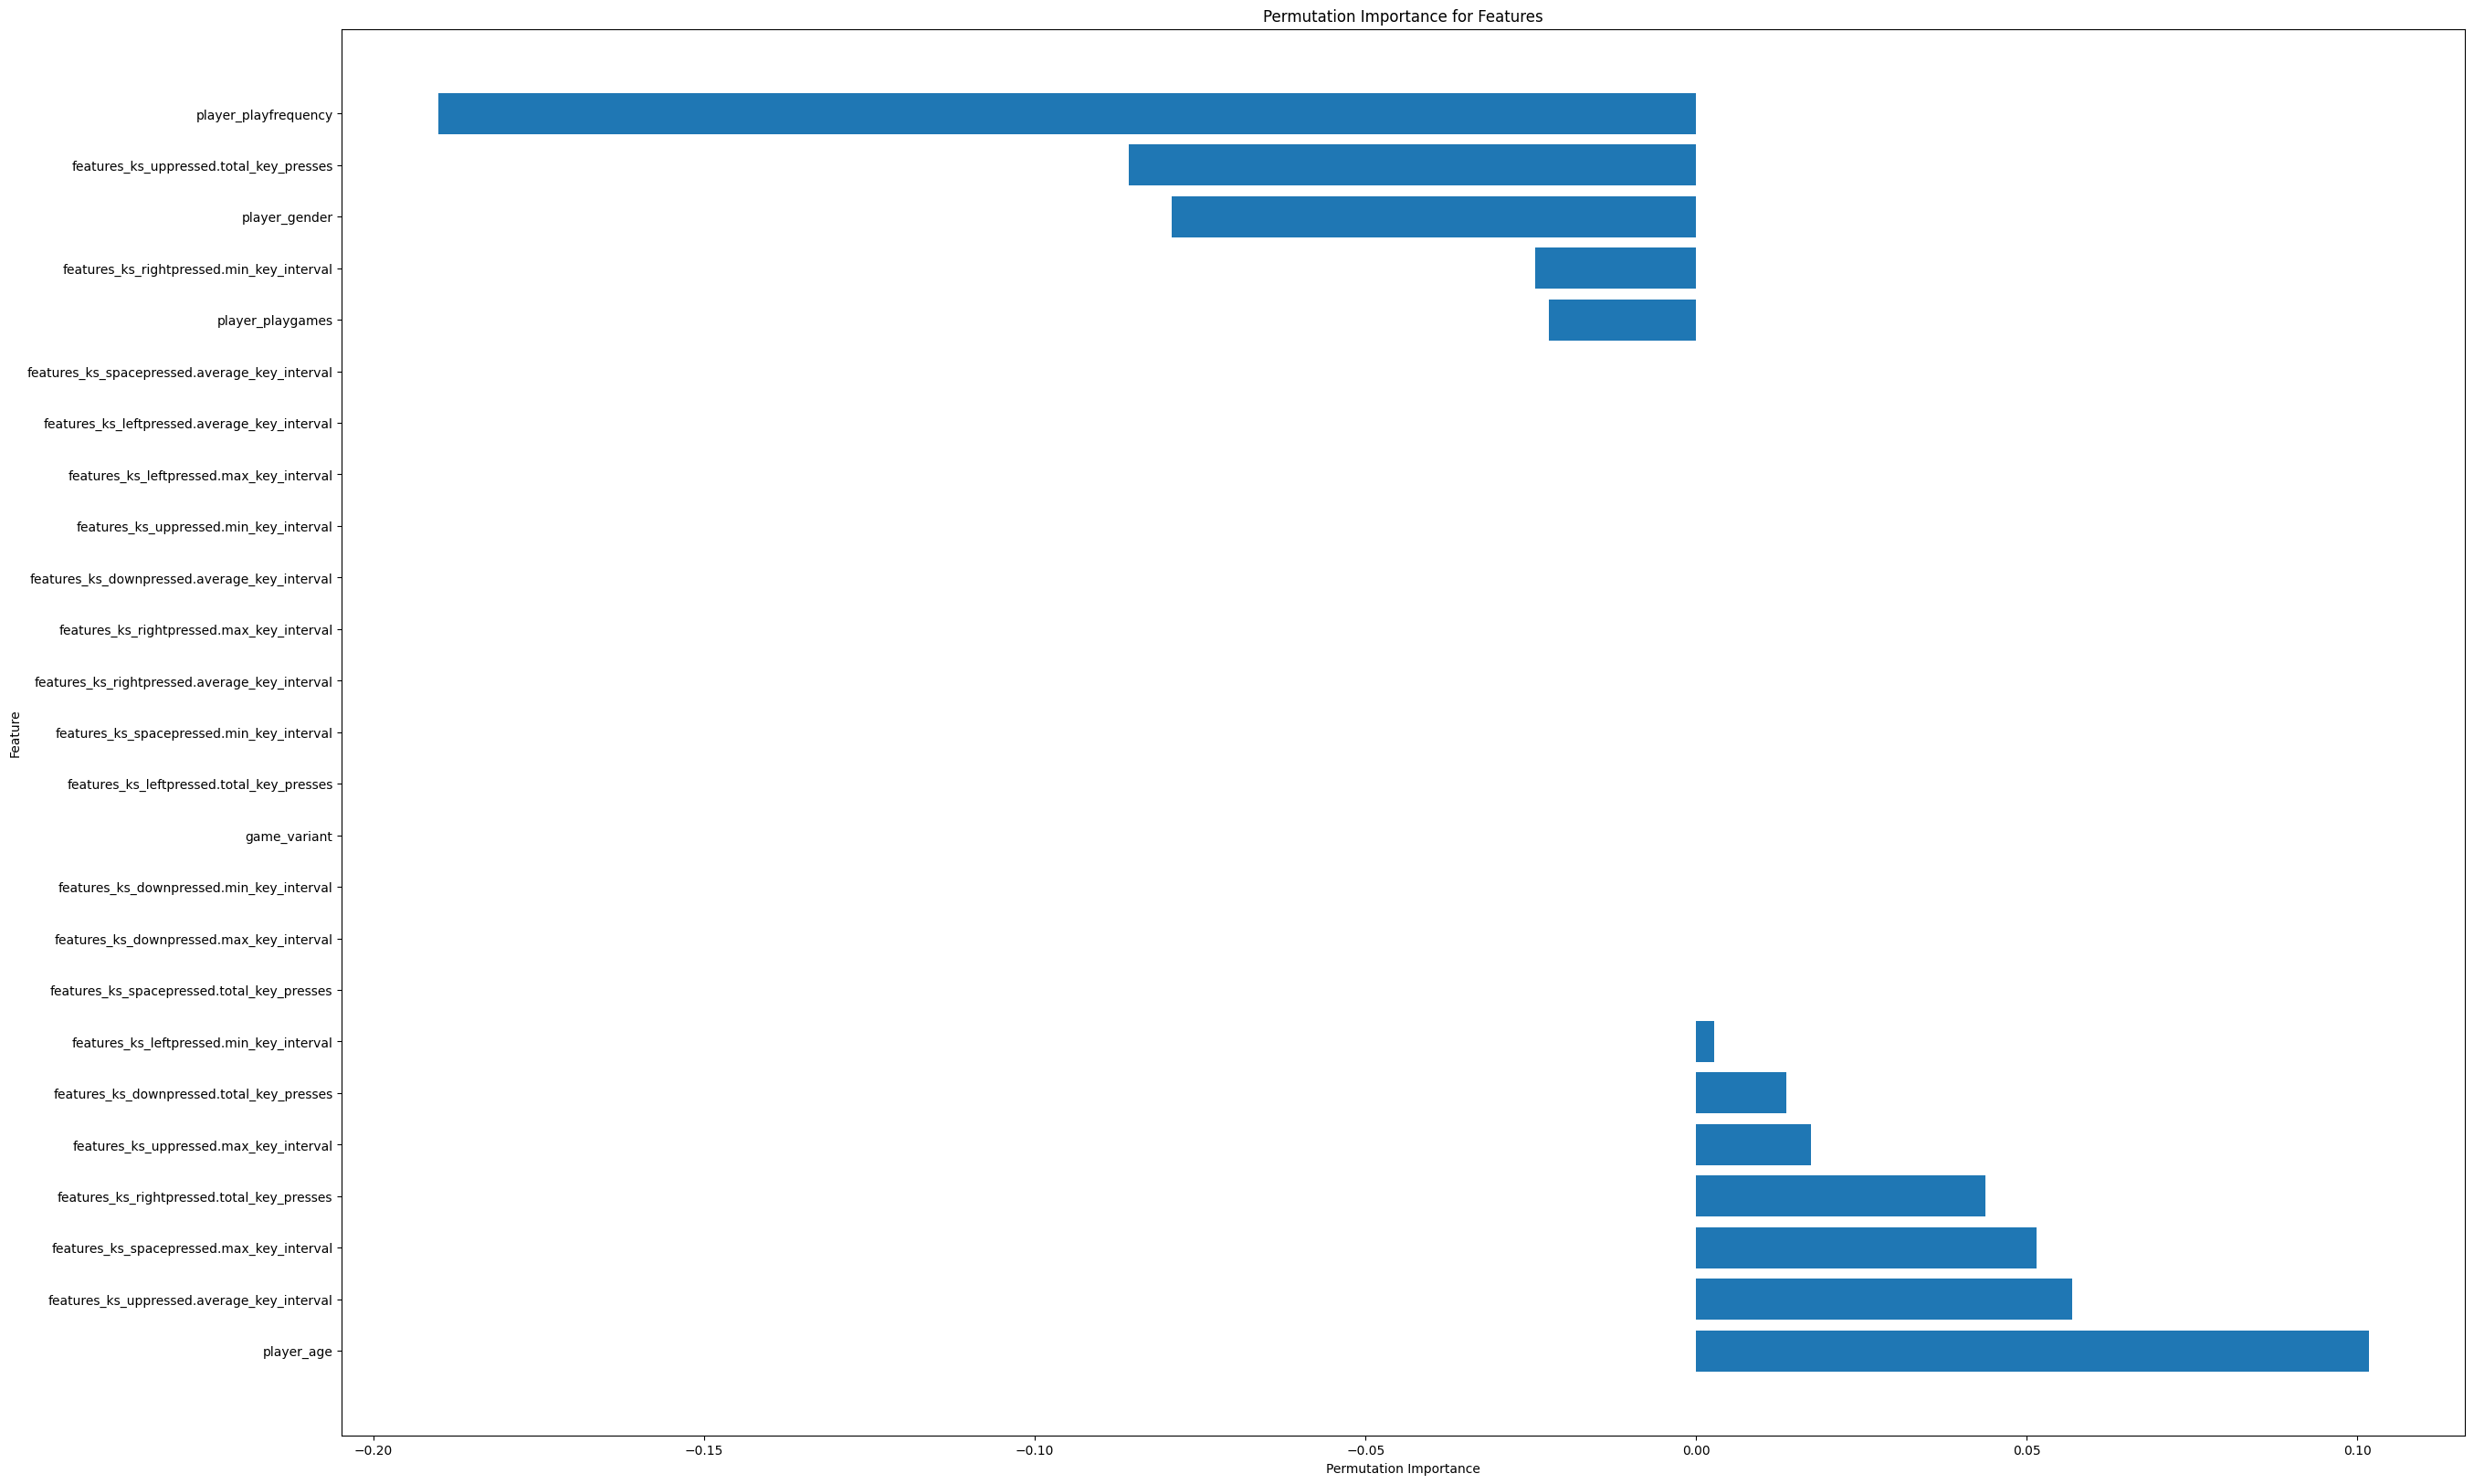

In [ ]:
from sklearn.inspection import permutation_importance
import matplotlib.pyplot as plt

all_keys_list = [
    'player_age', 'player_gender', 'player_playgames', 'player_playfrequency',
    'game_variant',
    'features_ks_leftpressed.total_key_presses', 'features_ks_leftpressed.average_key_interval',
    'features_ks_leftpressed.max_key_interval', 'features_ks_leftpressed.min_key_interval',
    'features_ks_uppressed.total_key_presses', 'features_ks_uppressed.average_key_interval',
    'features_ks_uppressed.max_key_interval', 'features_ks_uppressed.min_key_interval',
    'features_ks_spacepressed.total_key_presses', 'features_ks_spacepressed.average_key_interval',
    'features_ks_spacepressed.max_key_interval', 'features_ks_spacepressed.min_key_interval',
    'features_ks_rightpressed.total_key_presses', 'features_ks_rightpressed.average_key_interval',
    'features_ks_rightpressed.max_key_interval', 'features_ks_rightpressed.min_key_interval',
    'features_ks_downpressed.total_key_presses', 'features_ks_downpressed.average_key_interval',
    'features_ks_downpressed.max_key_interval', 'features_ks_downpressed.min_key_interval'
]

# Perform permutation importance
result = permutation_importance(regression_model, X_test, Y_test, n_repeats=10, random_state=42)

# Get feature importances and indices
importances = result.importances_mean
indices = np.argsort(importances)[::-1]

# Create a new list of feature names in the order of the indices
feature_names_ordered = [all_keys_list[i] for i in indices]

# Plot feature importances
plt.figure(figsize=(30, 20))
plt.barh(range(X_test.shape[1]), importances[indices], align="center")

yticks_spacing = 1.5  # Adjust the spacing factor
plt.yticks(range(X_test.shape[1]), [feature_names_ordered[i] for i in indices])
plt.xlabel("Permutation Importance")
plt.ylabel("Feature")

plt.title("Permutation Importance for Features")
plt.show()


In [ ]:
print("Number of features in test set:", X_test.shape[1])
print("Length of feature_names_list:", len(feature_names_ordered))
print("Indices:", indices)

Number of features in test set: 25
Length of feature_names_list: 25
Indices: [ 0  8 13 21  9  3  1  2 10 11 23 24 14 15 16 18 19 20 22 12  7 17  6  4
  5]


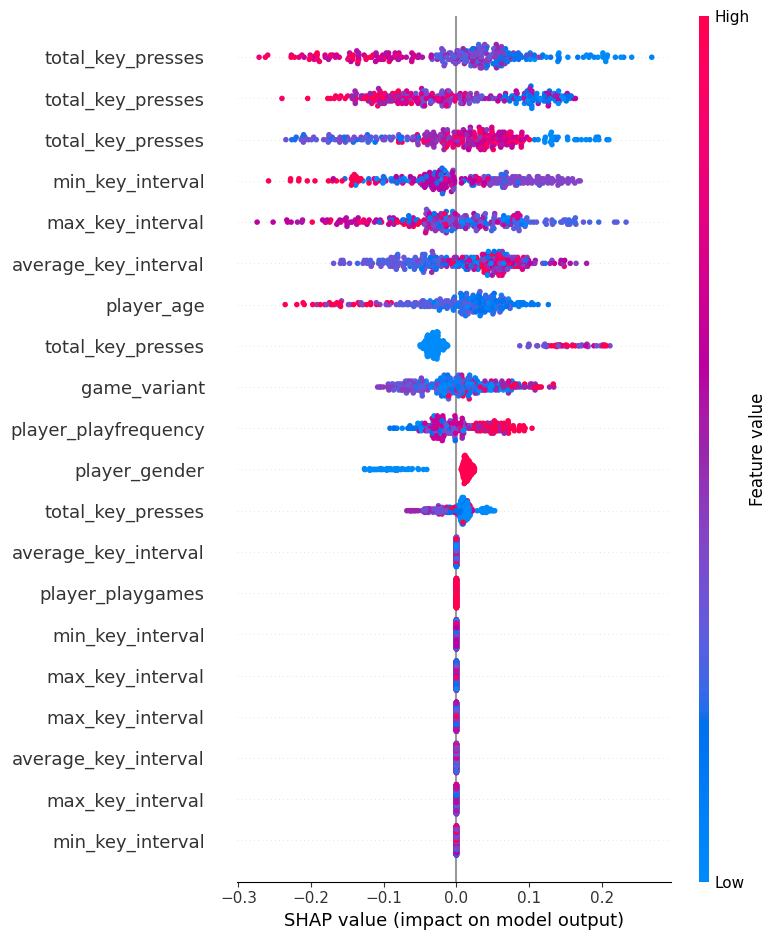

In [ ]:
# Explain the model using SHAP
explainer = shap.TreeExplainer(regression_model)
shap_values = explainer.shap_values(X)

# Visualize the SHAP summary plot
shap.summary_plot(shap_values, X, feature_names=feature_names)


In [ ]:
# How to improve the results?
# There are many modalities: game information, player information, and physiological information
# Which modality is more useful and which is less useful?
# Can the results be improved if the useless information are removed?

Early Stopping:

In [ ]:
from sklearn.experimental import enable_hist_gradient_boosting
from sklearn.ensemble import HistGradientBoostingRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

# Assuming 'X' and 'Y' are your features and target variable
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

# Regression Model Training with Early Stopping
regression_model = HistGradientBoostingRegressor(max_iter=1000, early_stopping=True, random_state=42)
regression_model.fit(X_train, Y_train)

# Predictions
Y_pred = regression_model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(Y_test, Y_pred)
print(f"Mean Squared Error: {mse}")


Mean Squared Error: 0.2841095171250682
